In [1]:
# Import required Libraries

In [2]:
import pathlib
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import load_img

In [3]:
#Defining train and test data 
mal_train_data=pathlib.Path("E:/UPSkilling/1_DATAscience_UPGRADE/Melanoma_Dataset/Train")
mal_test_data=pathlib.Path("E:/UPSkilling/1_DATAscience_UPGRADE/Melanoma_Dataset/Test") 

In [4]:
#Doing Image count using glob which will retrive files based on matching condition
train_img_count=len(list(mal_train_data.glob('*/*.jpg')))
test_img_count=len(list(mal_test_data.glob('*/*.jpg')))

In [5]:
print(train_img_count)
print(test_img_count)

2239
118


In [6]:
# Data visualization and print
#image_dataset_from_directory will return a tf dataset which provide image batch from subdirectory 
#using label_mode a categorical which represents "one hot encoding"
mal_img_dataset=tf.keras.preprocessing.image_dataset_from_directory(mal_train_data,batch_size=32,image_size=(180,180),label_mode='categorical',seed=123)

Found 24739 files belonging to 9 classes.


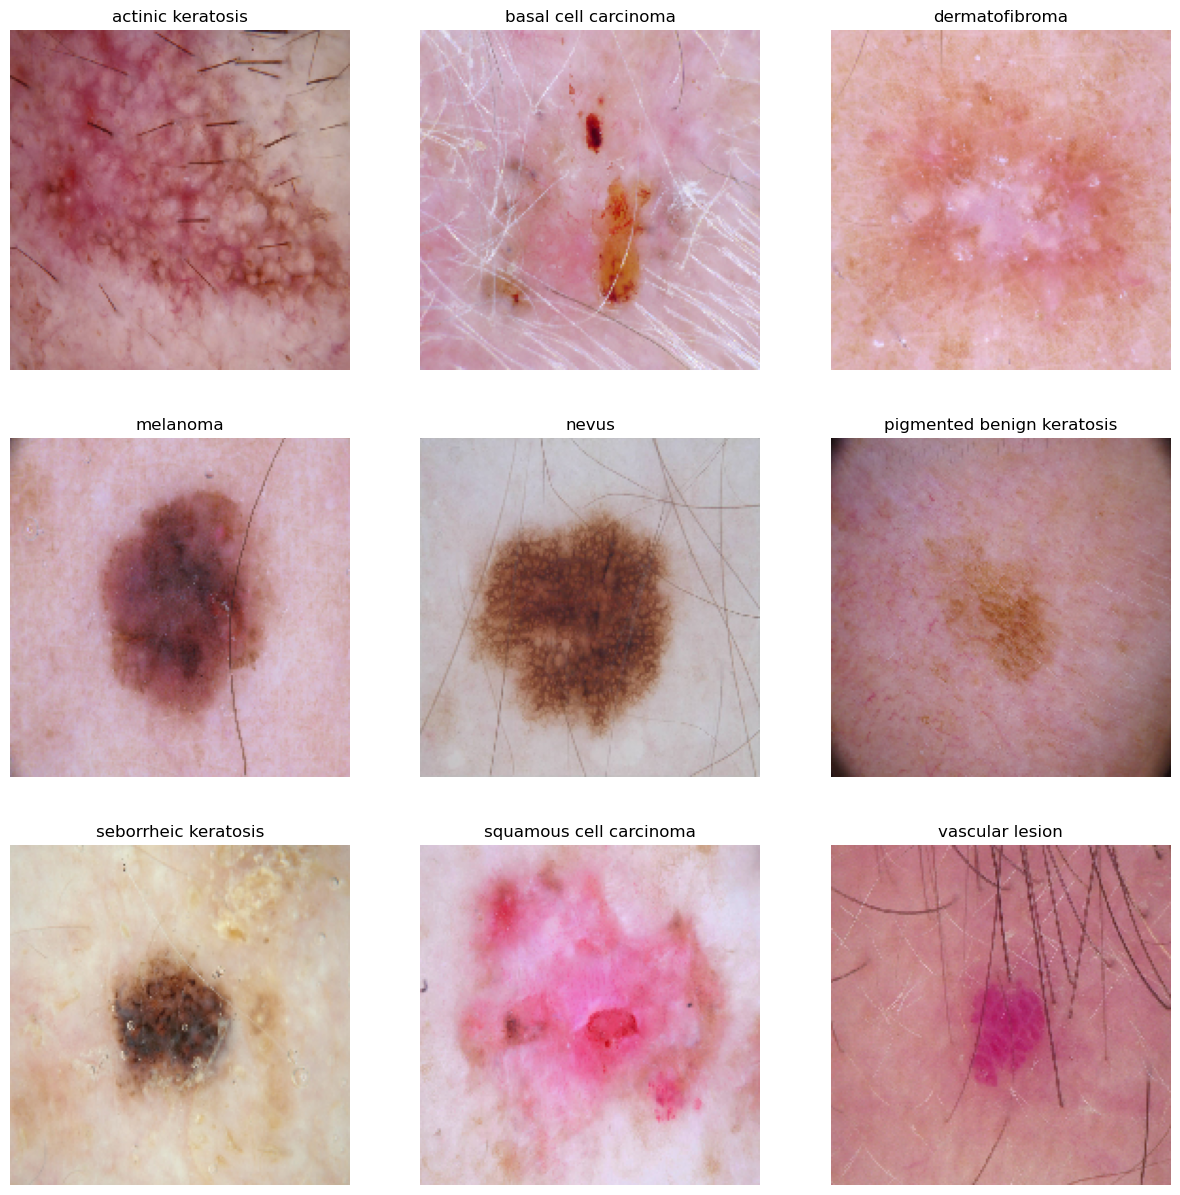

In [7]:
#all the classes of skin cancer stored on mal_class_names
mal_class_names=mal_img_dataset.class_names

files_path_dict={}

for m in mal_class_names:
    files_path_dict[m]=list(map(lambda x:str(mal_train_data)+'\\'+m+'\\'+x,os.listdir(str(mal_train_data)+'\\'+m)))

#viewing images

plt.figure(figsize=(15,15))
index=0
for c in mal_class_names:
    path_list=files_path_dict[c][:1]
    index+=1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

In [8]:
# count of  distribution of classes in training dataset

def mal_class_distribution_count(d):
    count=[]
    for path in pathlib.Path(d).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)  if os.path.isfile(os.path.join(path,name))]))
            
    # class names
    s_directory =[name for name in os.listdir(d) if os.path.isdir(os.path.join(d,name))]
    
    return pd.DataFrame(list(zip(s_directory,count)),columns=['Class','No of Image'])

df = mal_class_distribution_count(mal_train_data)
df

,Class,No of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


<AxesSubplot:xlabel='No of Image', ylabel='Class'>

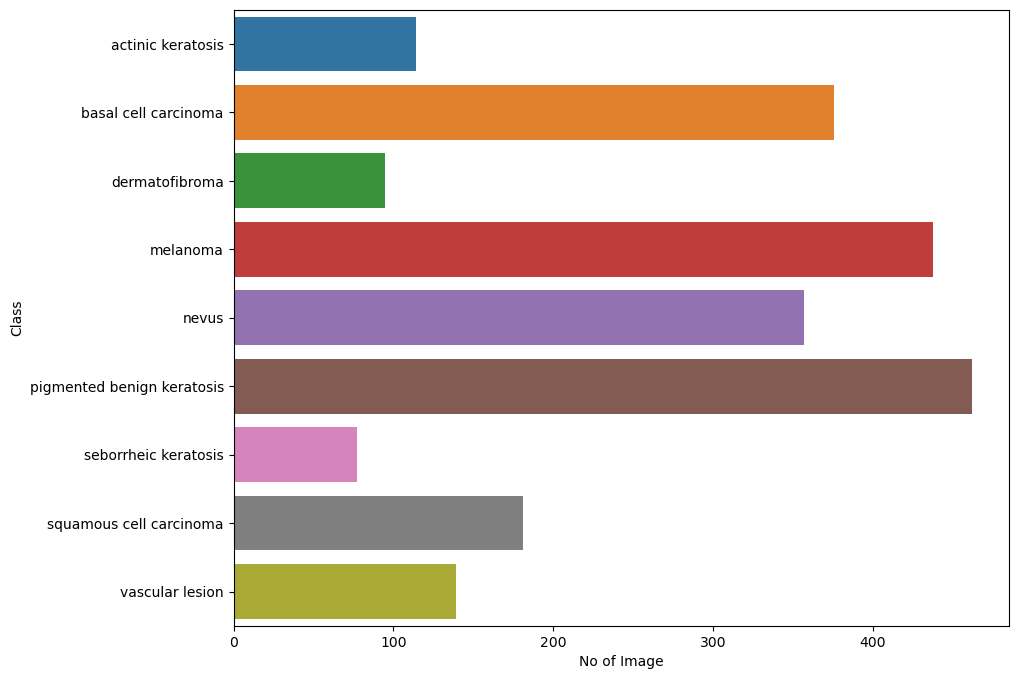

In [9]:
# plot  distribution of classes in training dataset
import seaborn as sns
plt.figure(figsize=(10,8))
sns.barplot(x="No of Image",y="Class",data=df,label="Class")

Theres is class imbalance , to solve this using a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [10]:
#install Augmentor
!pip install Augmentor

In [11]:
train_data_path="E:/UPSkilling/1_DATAscience_UPGRADE/Melanoma_Dataset/Train/"
import Augmentor
for i in mal_class_names:
    p=Augmentor.Pipeline(train_data_path+i)
    p.rotate(probability=0.7,max_left_rotation=10,max_right_rotation=10)
    p.sample(500)  #adding 500 samples for every class to make sure that no classes are sparse

Initialised with 114 image(s) found.
Output directory set to E:/UPSkilling/1_DATAscience_UPGRADE/Melanoma_Dataset/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C45D6E2C70>: 100%|██████████| 500/500 [00:04<00:00, 110.84 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to E:/UPSkilling/1_DATAscience_UPGRADE/Melanoma_Dataset/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C45BBB3250>: 100%|██████████| 500/500 [00:04<00:00, 106.34 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to E:/UPSkilling/1_DATAscience_UPGRADE/Melanoma_Dataset/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C45B5C3640>: 100%|██████████| 500/500 [00:04<00:00, 113.89 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to E:/UPSkilling/1_DATAscience_UPGRADE/Melanoma_Dataset/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x1C45D661EE0>: 100%|██████████| 500/500 [00:22<00:00, 22.25 Samples/s]                  


Initialised with 357 image(s) found.
Output directory set to E:/UPSkilling/1_DATAscience_UPGRADE/Melanoma_Dataset/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=824x719 at 0x1C45D6A8580>: 100%|██████████| 500/500 [00:22<00:00, 22.49 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to E:/UPSkilling/1_DATAscience_UPGRADE/Melanoma_Dataset/Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1C45D698BE0>: 100%|██████████| 500/500 [00:04<00:00, 110.55 Samples/s]


Initialised with 77 image(s) found.
Output directory set to E:/UPSkilling/1_DATAscience_UPGRADE/Melanoma_Dataset/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1C45D6D9C10>: 100%|██████████| 500/500 [00:12<00:00, 41.50 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to E:/UPSkilling/1_DATAscience_UPGRADE/Melanoma_Dataset/Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1C45D708280>: 100%|██████████| 500/500 [00:04<00:00, 108.87 Samples/s]


Initialised with 139 image(s) found.
Output directory set to E:/UPSkilling/1_DATAscience_UPGRADE/Melanoma_Dataset/Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1C45BBC7BE0>: 100%|██████████| 500/500 [00:04<00:00, 102.04 Samples/s]


In [12]:
#count total number of image generated by Augmentor
img_count_train=len(list(mal_train_data.glob('*/output/*.jpg')))

In [13]:
print(img_count_train)

27000


In [14]:
#Building model
ds_train= tf.keras.preprocessing.image_dataset_from_directory(mal_train_data,batch_size=32,image_size=(180,180),label_mode='categorical',
                                                             seed=123,subset="training",validation_split=0.2)

Found 29239 files belonging to 9 classes.
Using 23392 files for training.


In [15]:
#validation dataset
ds_val=tf.keras.preprocessing.image_dataset_from_directory(mal_train_data,batch_size=32,image_size=(180,180),
                                                           label_mode='categorical',seed=123,subset="validation",
                                                           validation_split=0.2)

Found 29239 files belonging to 9 classes.
Using 5847 files for validation.


In [16]:
#tf.data.experimental.AUTOTUNE defines appropriate number of processed that are free for doing work
# df.cache() keeps the images in memory after they are loaded off disk during first epoch 
# df.prefetch() overlaps data processing and model execution while training dataset

autotune=tf.data.experimental.AUTOTUNE
ds_train= ds_train.cache().shuffle(1000).prefetch(buffer_size=autotune)
ds_val=ds_val.cache().prefetch(buffer_size=autotune)

In [17]:
#CNN Model

#sequential allows to create model layer by layer 

#Sequential allows you to create models layer-by-layer  
mal_model = Sequential()

#Rescaling Layer
mal_model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   

#1st Convulation layer
mal_model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
mal_model.add(layers.MaxPool2D(pool_size=(2,2)))

#2nd Convulation Layer
mal_model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
mal_model.add(layers.MaxPool2D(pool_size=(2,2)))

#3rd Convulation Layer
mal_model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
mal_model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
mal_model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
mal_model.add(layers.Flatten())

#Dense Layer
mal_model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
mal_model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
mal_model.add(layers.Dense(len(mal_class_names),activation='softmax'))

mal_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

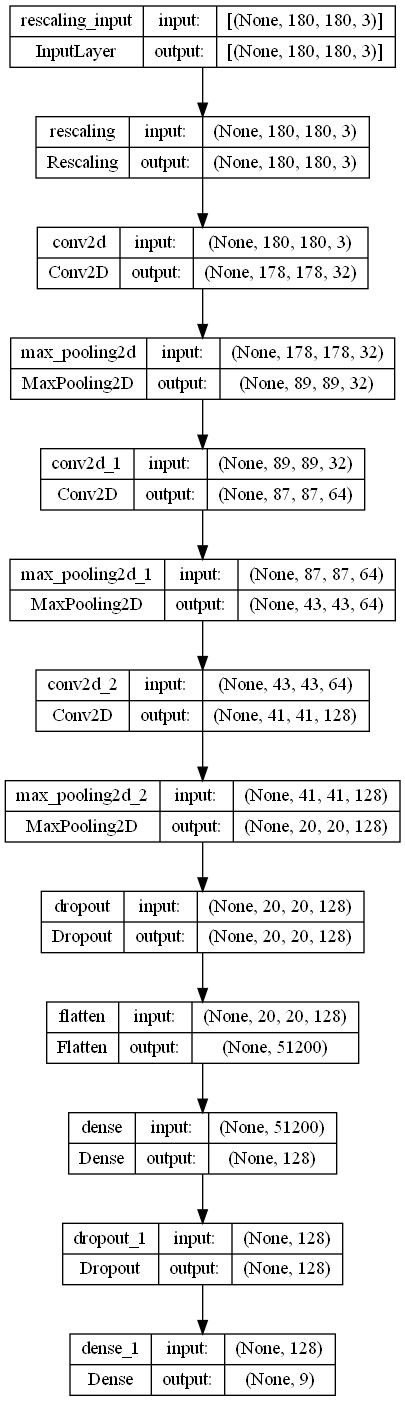

In [18]:
#model vizualization
from tensorflow.keras.utils import plot_model
plot_model(mal_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [19]:
# Model Compilation

#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

mal_model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when  monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

In [20]:
# Training the model
epochs = 20
history = mal_model.fit(ds_train, validation_data=ds_val, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/20
731/731 [==============================] - ETA: 0s - loss: 1.5204 - accuracy: 0.4086
Epoch 1: val_accuracy improved from -inf to 0.54763, saving model to model.h5


E:\Anaconda\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


731/731 [==============================] - 1101s 1s/step - loss: 1.5204 - accuracy: 0.4086 - val_loss: 1.1914 - val_accuracy: 0.5476
Epoch 2/20
731/731 [==============================] - ETA: 0s - loss: 1.0852 - accuracy: 0.5926
Epoch 2: val_accuracy improved from 0.54763 to 0.69814, saving model to model.h5
731/731 [==============================] - 823s 1s/step - loss: 1.0852 - accuracy: 0.5926 - val_loss: 0.8357 - val_accuracy: 0.6981
Epoch 3/20
731/731 [==============================] - ETA: 0s - loss: 0.8356 - accuracy: 0.6917
Epoch 3: val_accuracy improved from 0.69814 to 0.80041, saving model to model.h5
731/731 [==============================] - 853s 1s/step - loss: 0.8356 - accuracy: 0.6917 - val_loss: 0.5944 - val_accuracy: 0.8004
Epoch 4/20
731/731 [==============================] - ETA: 0s - loss: 0.6478 - accuracy: 0.7616
Epoch 4: val_accuracy improved from 0.80041 to 0.84248, saving model to model.h5
731/731 [==============================] - 851s 1s/step - loss: 0.6478 -

In [ ]:
#Epoch 0020: Val_accuracy starts decresing from previous one 

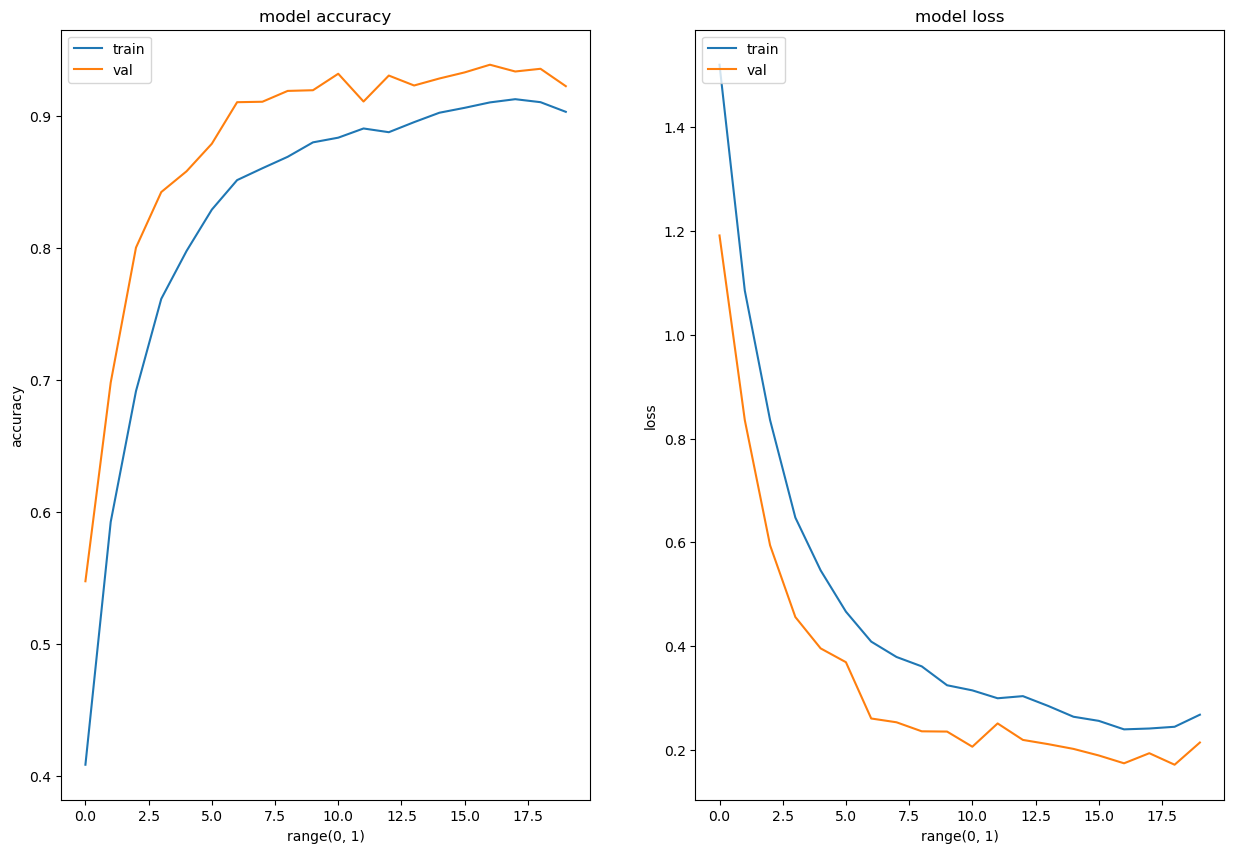

In [21]:
# Plot  training curves
epochs_range_val = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range_val)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range_val)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 32ms/step
Actual Class basal cell carcinoma
Predictive Class squamous cell carcinoma


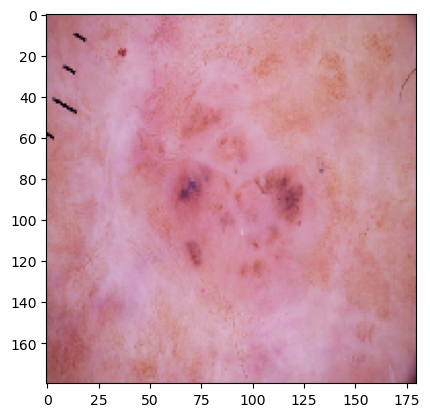

In [26]:
#Model Prediction

from glob import glob
test_image_path = os.path.join(mal_test_data, mal_class_names[1], '*')
test_image = glob(test_image_path)
test_image = load_img(test_image[-1],target_size=(180,180,3))
plt.imshow(test_image)
plt.grid(False)

mal_img = np.expand_dims(test_image,axis=0)
mal_pred = mal_model.predict(mal_img)
mal_pred = np.argmax(mal_pred)
pred_class = mal_class_names[mal_pred]
print("Actual Class "+ mal_class_names[1] +'\n'+ "Predictive Class "+pred_class )